<a href="https://colab.research.google.com/github/junheecho-zz/play2021/blob/master/Training_Grape_Type_Classifier_using_fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference

1. [fastai tutorial](https://docs.fast.ai/tutorial.vision.html)
1. [Deep Learning Image Classification with Fastai](https://towardsdatascience.com/deep-learning-image-classification-with-fast-ai-fc4dc9052106) (fastai v1 API 사용 부분 수정)
1. [CNN Interpretation with CAM](https://colab.research.google.com/github/fastai/fastbook/blob/master/18_CAM.ipynb)

# grape type clasifier using fastai2

## 1. Install and import fastai 

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
import fastai
fastai.__version__

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 186 kB 29.9 MB/s 
     |████████████████████████████████| 1.2 MB 29.0 MB/s 
     |████████████████████████████████| 56 kB 3.3 MB/s 
     |████████████████████████████████| 51 kB 259 kB/s 
Mounted at /content/gdrive


'2.5.2'

## 2. Training 

### 2.1 Download grape dataset

In [2]:
%%capture
!rm -rf grape_dataset
!wget https://www.dropbox.com/s/cdle49xzq3kcwnq/grape-dataset.tar.gz?dl=0 -O grape_dataset.tar.gz
!tar xvfz grape_dataset.tar.gz

### 2.2 Verifying dataset images

In [3]:
import glob

files = glob.glob("grape-dataset/**/*.jpg", recursive=True)
failed = verify_images(files)
print ('corrupted images', failed)
if len(failed) > 0:
  failed.map(os.remove)
  print ('deleted', failed)

corrupted images ['grape-dataset/shine muscat grape/0043.jpg']
deleted ['grape-dataset/shine muscat grape/0043.jpg']


### 2.3 Training (Transfer learning)

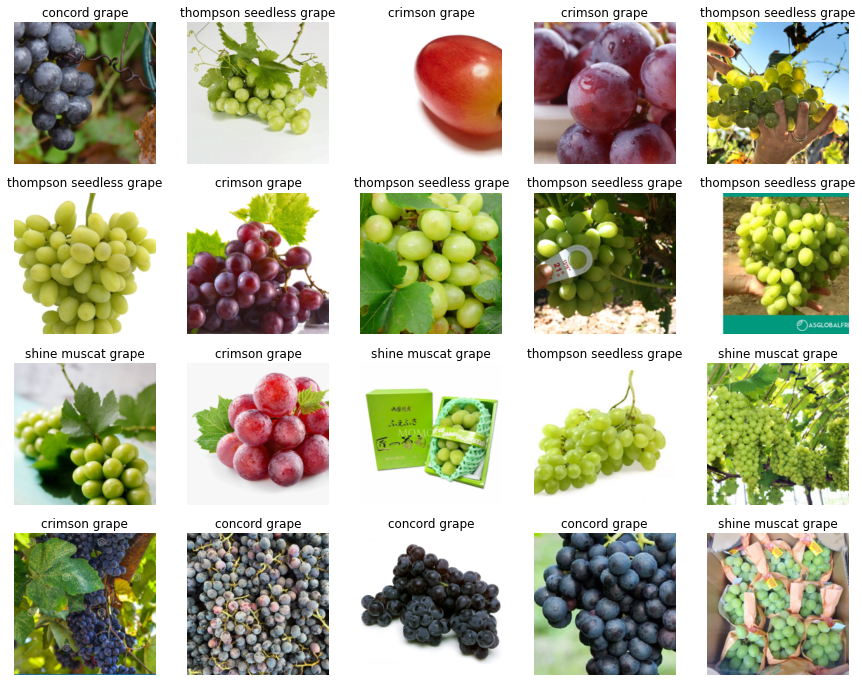

In [4]:
tfms = aug_transforms(flip_vert=False)
path = './grape-dataset'
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))
dls.show_batch(max_n=20)

In [5]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


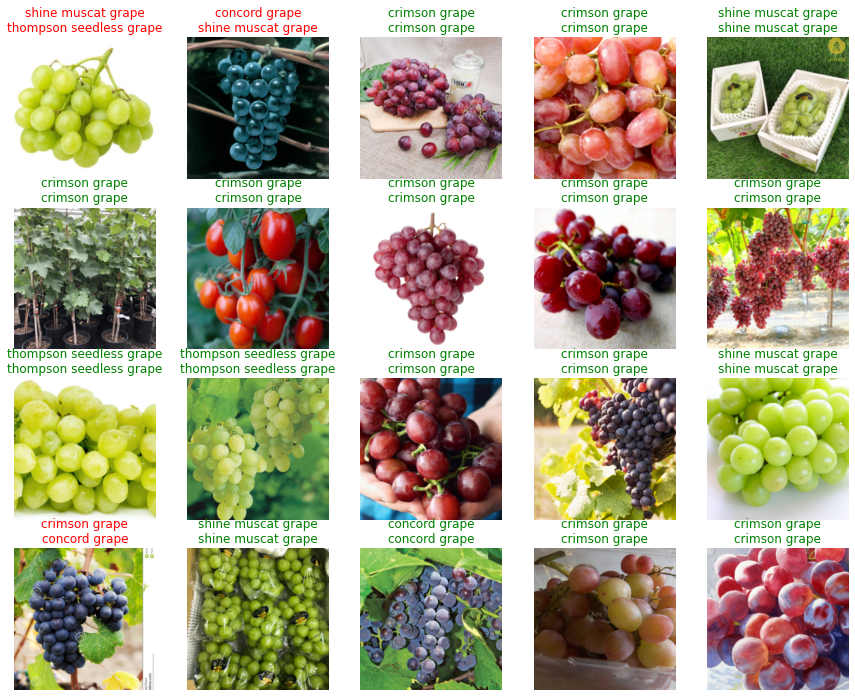

In [6]:
learn.show_results(max_n=20)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=6.30957365501672e-05)

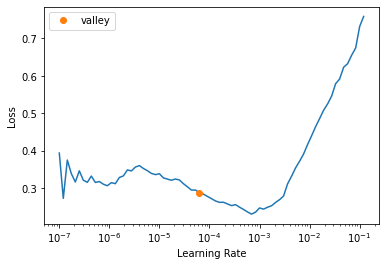

In [7]:
learn.lr_find()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


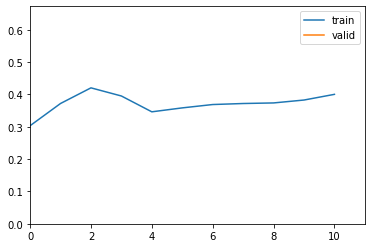

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


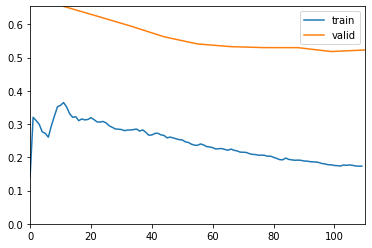

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [8]:
learn.fine_tune(10, 5e-5,cbs=[ShowGraphCallback()])

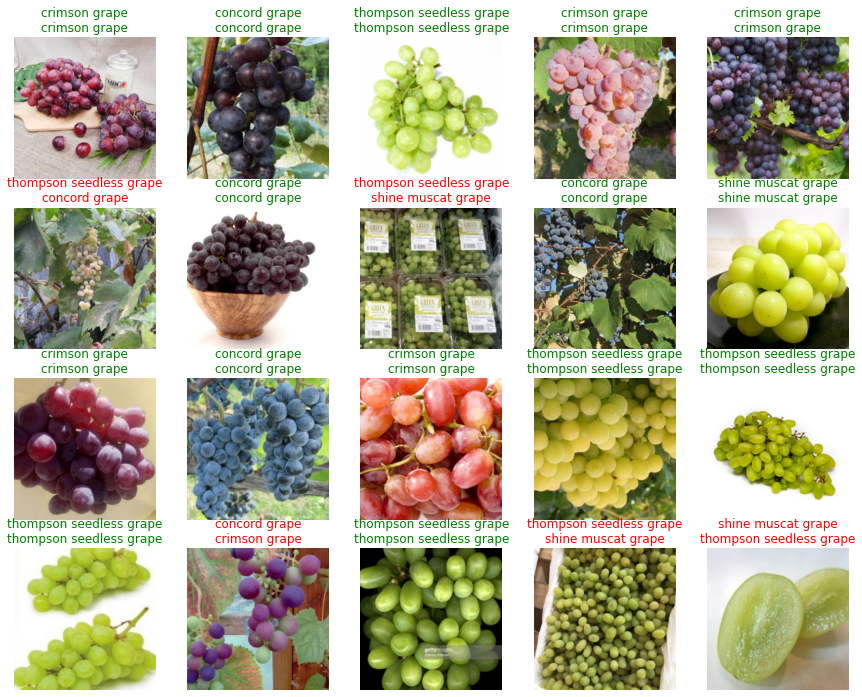

In [9]:
learn.show_results(max_n=20)

### 2.4 Interpretation

**plot top losses**

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


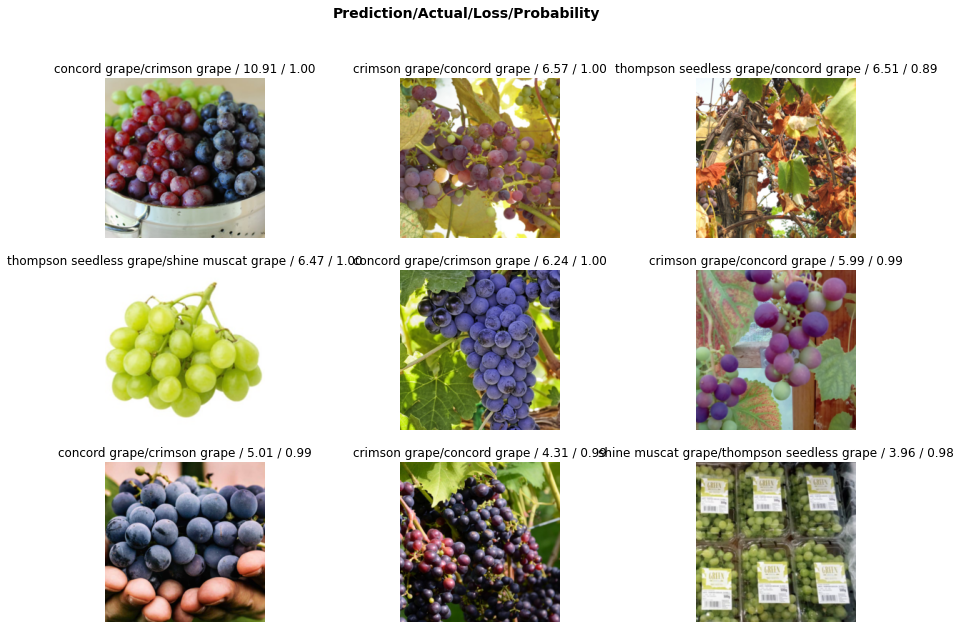

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [11]:
#interp.most_confused(min_val=9)
interp.most_confused()

[('crimson grape', 'concord grape', 7),
 ('concord grape', 'crimson grape', 6),
 ('shine muscat grape', 'thompson seedless grape', 5),
 ('thompson seedless grape', 'shine muscat grape', 5),
 ('concord grape', 'thompson seedless grape', 1),
 ('shine muscat grape', 'concord grape', 1),
 ('thompson seedless grape', 'concord grape', 1)]

**Confusion Matrix**

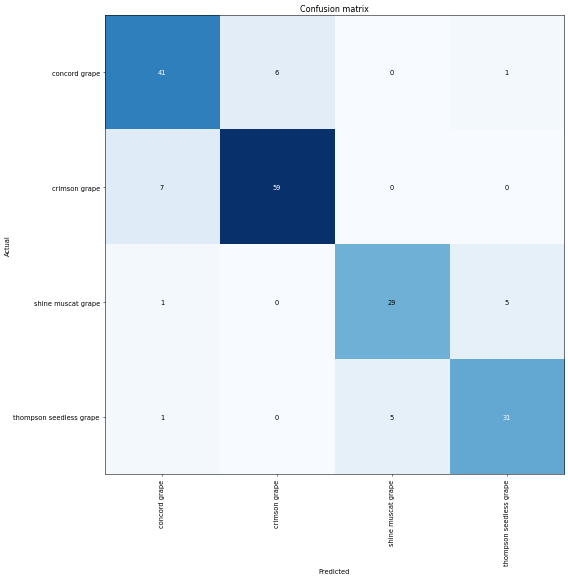

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=48)

### 2.5 save model

In [13]:
def get_time_stamp():
  import datetime
  now = datetime.datetime.now()
  timestamp = now.strftime('%Y-%m-%d_%H-%M-%S')
  return timestamp

fname = f'./grape-type_{get_time_stamp()}.pkl'
print ('save', fname)
learn.export(os.path.abspath(fname))
!cp {fname} /content/gdrive/MyDrive/w2/grape-type/

save ./grape-type_2021-10-11_08-09-47.pkl


## 3. Test with webcam